In [107]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [3]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb

In [13]:
# Download and assign the data set using load_data()

(x_train,y_train),(x_test,y_test)=imdb.load_data()

#### Inspect the dataset

In [6]:
# Inspect the type of the data
type(x_train)

numpy.ndarray

In [9]:
# Inspect the shape of the data
x_train.shape

(25000,)

In [11]:
# Display the first dataset element input
# Notice encoding
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [14]:
# Display the first dataset element output
y_train[0]

1

#### Load dataset with different options

In [17]:
# Load the dataset with defaults
imdb.load_data(path='imbd.npz',
              index_from=3)

# ~/.keras/dataset/

17465344/17464789 [==============================] - 0s 0us/step


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [18]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=500)

((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [21]:
# Ignore the top 10 most frequent words using skip_top
imdb.load_data(skip_top=10,num_words=1000,oov_char=2)

((array([list([2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 14, 394, 20, 13, 119, 954, 

In [23]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(maxlen=500)


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [24]:
# Use '1' as the character that indicates the start of a sequence

imdb.load_data(start_char=1)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [35]:
# Load the imdb word index using get_word_index()
imdb_word_index=imdb.get_word_index()

In [36]:
# View the word index as a dictionary,
# accounting for index_from.
index_from=3
imdb_word_index={key:value + index_from for key,value in imdb_word_index.items() }

In [37]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']
imdb_word_index['the']


4

In [40]:
# View an input sentence
inv_imdb_word_index={value:key for key,value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if (index > index_from)]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [41]:
# Get the sentiment value
y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [42]:
# Load the imdb data set
(x_train,y_train),(x_test,y_test)=imdb.load_data()

#### Preprocess the data with padding

In [43]:
# Inspect the input data shape
x_train.shape

(25000,)

In [45]:
# Pad the inputs to the maximum length using maxlen
padded_x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=300,padding='post',truncating='pre')

In [46]:
# Inspect the output data shape
padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [47]:
# Import numpy 
import numpy as np


In [48]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims
np.expand_dims(padded_x_train,-1)


array([[[   1],
        [  14],
        [  22],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [ 194],
        [1153],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [  14],
        [  47],
        ...,
        [   0],
        [   0],
        [   0]],

       ...,

       [[   1],
        [  11],
        [   6],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [1446],
        [7079],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [  17],
        [   6],
        ...,
        [   0],
        [   0],
        [   0]]], dtype=int32)

In [51]:
# Create a Masking layer 
tf_x_train=tf.convert_to_tensor(padded_x_train,dtype='float32')
masking_layer=tf.keras.layers.Masking(mask_value=0.0)


In [53]:
# Pass tf_x_train to it
masked_x_train=masking_layer(tf_x_train)

In [54]:
# Look at the dataset

tf_x_train

<tf.Tensor: id=1, shape=(25000, 300), dtype=float32, numpy=
array([[1.000e+00, 1.400e+01, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.940e+02, 1.153e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.400e+01, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.100e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.446e+03, 7.079e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.700e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)>

In [55]:
# Look at the ._keras_mask for the dataset

masked_x_train

<tf.Tensor: id=8, shape=(25000, 300), dtype=float32, numpy=
array([[1.000e+00, 1.400e+01, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.940e+02, 1.153e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.400e+01, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.100e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.446e+03, 7.079e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.700e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [67]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer=tf.keras.layers.Embedding(input_dim=501,output_dim=16)

In [69]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices=tf.constant([[[0],[1],[5],[500]]])
sequences_of_embeddings=embedding_layer(sequence_of_indices)
sequences_of_embeddings

<tf.Tensor: id=42, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.02877263, -0.04866865, -0.03304682,  0.02090834,
           0.02817264, -0.04651171,  0.02636207,  0.00802139,
          -0.04460333, -0.02667554, -0.03484335,  0.0481918 ,
          -0.0119465 ,  0.0368279 , -0.0464255 , -0.01884762]],

        [[ 0.03232479, -0.02635177,  0.00085033,  0.0010885 ,
          -0.00105834, -0.0044227 ,  0.01023115, -0.03281521,
          -0.00310079, -0.03425016,  0.02943918, -0.04125081,
           0.03420475, -0.04621635,  0.02661492,  0.01559437]],

        [[-0.01185532, -0.02855587, -0.04319454,  0.03917933,
           0.01989875, -0.02003735,  0.03057928,  0.02263938,
          -0.03150371,  0.04510275,  0.01486105, -0.02033389,
           0.00667509,  0.02130643, -0.04806541,  0.01863731]],

        [[-0.04842912, -0.01314162, -0.01903698,  0.048715  ,
           0.02070191, -0.02931442, -0.04257436,  0.00518801,
          -0.00523872, -0.00680741,  0.01480624,  0.04694063,

In [70]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0]

array([[ 0.02877263, -0.04866865, -0.03304682, ...,  0.0368279 ,
        -0.0464255 , -0.01884762],
       [ 0.03232479, -0.02635177,  0.00085033, ..., -0.04621635,
         0.02661492,  0.01559437],
       [ 0.01609499, -0.00855552, -0.04493266, ...,  0.03480312,
        -0.00547666,  0.02209163],
       ...,
       [ 0.04501486,  0.00680646, -0.02832668, ..., -0.02044657,
         0.00333674,  0.01614696],
       [-0.0446874 , -0.01877555,  0.0362463 , ...,  0.03446983,
         0.00546066,  0.04753338],
       [-0.04842912, -0.01314162, -0.01903698, ..., -0.03364668,
        -0.04321274,  0.02449815]], dtype=float32)

In [71]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][14,:]


array([-0.04178005,  0.00520136,  0.0089943 , -0.04205627,  0.04231781,
       -0.02851737,  0.02061622,  0.03990252,  0.02662443,  0.02833611,
        0.04308758, -0.01404224, -0.02492284, -0.00248582, -0.03672264,
        0.03104668], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [72]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer=tf.keras.layers.Embedding(input_dim=501,output_dim=16,mask_zero=True)

In [74]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequences_of_embeddings=masking_embedding_layer(sequence_of_indices)
masked_sequences_of_embeddings._keras_mask

<tf.Tensor: id=63, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [75]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [76]:
# Load the dataset

(x_train, y_train), (x_test, y_test)=get_and_pad_imdb_dataset()

In [77]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [78]:
# Get the word index
imdb_word_index=get_imdb_word_index()


In [79]:
# Swap the keys and values of the word index

inv_word_index={value:key for key,value in imdb_word_index.items()}

In [80]:
# View the first dataset example sentence
[inv_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [82]:
# Get the maximum token value
max_index_value=max(imdb_word_index.values())

In [83]:
# Specify an embedding dimension
embedding_dim=16

In [84]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [85]:
# Functional API refresher: use the Model to build the same model

review_sequences=tf.keras.Input((None,))
embedding_sequence=tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=False)(review_sequences)
average_embedding=tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability=tf.keras.layers.Dense(1,activation='sigmoid')(average_embedding)
model=tf.keras.Model(inputs=review_sequences,outputs=positive_probability)

In [86]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [87]:
# Compile the model with a binary cross-entropy loss
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [90]:
# Train the model using .fit(), savng its history
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test),validation_steps=20)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.6695 - accuracy: 0.6819 - val_loss: 0.0166 - val_accuracy: 0.7484
Epoch 2/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.6276 - accuracy: 0.7510 - val_loss: 0.0154 - val_accuracy: 0.7641
Epoch 3/5
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.5768 - accuracy: 0.7941 - val_loss: 0.0142 - val_accuracy: 0.7719
Epoch 4/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.5277 - accuracy: 0.8172 - val_loss: 0.0130 - val_accuracy: 0.8031
Epoch 5/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.4845 - accuracy: 0.8359 - val_loss: 0.0121 - val_accuracy: 0.8078


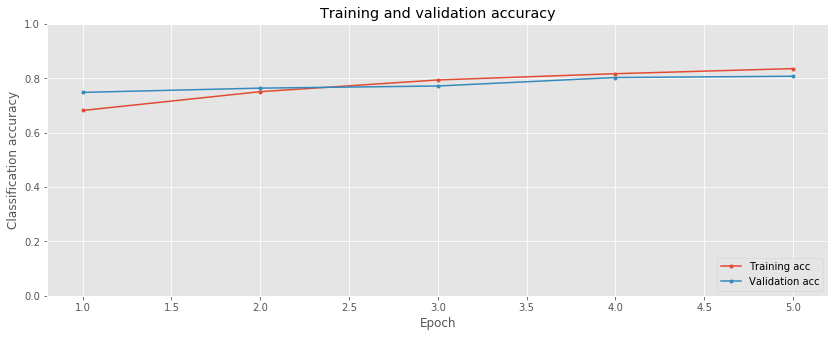

In [92]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [94]:
# Retrieve the embedding layer's weights from the trained model

weights=model.layers[1].get_weights()[0]

In [95]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

FileNotFoundError: [Errno 2] No such file or directory: 'data/vecs.tsv'

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [96]:
# Create a SimpleRNN layer and test it
simplernn_layer=tf.keras.layers.SimpleRNN(units=16)

In [98]:
# Note that only the final cell output is returned
sequence=tf.constant([[[1.,1.],[2.,2.],[56.,-100.]]])
layer_output=simplernn_layer(sequence)
layer_output

<tf.Tensor: id=15825, shape=(1, 16), dtype=float32, numpy=
array([[-1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,
         1., -1., -1.]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [99]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [100]:
# Load the dataset

(x_train, y_train), (x_test, y_test)=get_and_pad_imdb_dataset(maxlen=250)

In [101]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [102]:
# Get the word index using get_imdb_word_index()
imdb_word_index=get_imdb_word_index()

#### Create a recurrent neural network model

In [105]:
# Get the maximum index value
max_index_value=max(imdb_word_index.values())
embedding_dim=16

In [111]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])


#### Compile and fit the model

In [113]:
# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [114]:
# Fit the model and save its training history
history=model.fit(x_train,y_train,epochs=3,batch_size=32)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 526s 21ms/sample - loss: 0.3950 - accuracy: 0.8155
Epoch 2/3
25000/25000 [==============================] - 475s 19ms/sample - loss: 0.2285 - accuracy: 0.9146
Epoch 3/3
25000/25000 [==============================] - 474s 19ms/sample - loss: 0.1829 - accuracy: 0.9338


#### Plot learning curves

ValueError: x and y must have same first dimension, but have shapes (3,) and (5,)

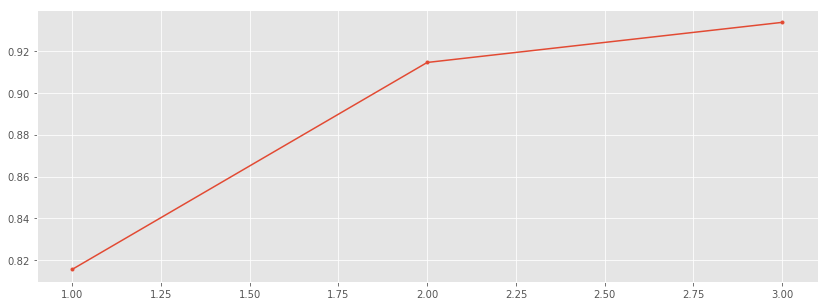

In [118]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
loss     = history_dict['loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [119]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index={value:key for key,value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index >2]

['ignore',
 'the',
 'bad',
 'reviews',
 'on',
 'here',
 'this',
 'film',
 'is',
 'awesome',
 'just',
 'before',
 'dawn',
 'is',
 'a',
 'great',
 'example',
 'of',
 'what',
 'can',
 'be',
 'done',
 'in',
 'a',
 'film',
 'with',
 'a',
 'minimal',
 'budget',
 'if',
 'you',
 'have',
 'a',
 'dedicated',
 'crew',
 'decent',
 'script',
 'and',
 'a',
 'cool',
 'idea',
 'for',
 'a',
 'film',
 "it's",
 'a',
 'hell',
 'of',
 'a',
 'lot',
 'of',
 'fun',
 'br',
 'br',
 'i',
 'enjoyed',
 'it',
 'a',
 'lot',
 'more',
 'than',
 'most',
 'other',
 "80's",
 'slashers',
 'because',
 'the',
 'killer',
 'is',
 'so',
 'unique',
 'wrong',
 'turn',
 'ripped',
 'this',
 'movie',
 'off',
 'something',
 'fierce',
 "there's",
 'plenty',
 'of',
 'blood',
 'and',
 'scares',
 'my',
 'girlfriend',
 'was',
 'freaked',
 'out',
 'and',
 'she',
 'watches',
 'almost',
 'everything',
 'with',
 'me',
 'and',
 "doesn't",
 "it's",
 'got',
 'that',
 'creepiness',
 'to',
 'it',
 'br',
 'br',
 "i'd",
 'say',
 'that',
 'just',
 '

In [120]:
# Get the model prediction using model.predict()
model.predict(x_test[None,0,:])

array([[0.9881066]], dtype=float32)

In [121]:
# Get the corresponding label
y_test[0]


1

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [122]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [126]:
# Load the dataset

(x_train, y_train), (x_test, y_test)=get_and_pad_imdb_dataset(num_words=5000,maxlen=250)

In [127]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [128]:
# Get the word index using get_imdb_word_index()
imdb_word_index=get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [130]:
# Get the maximum index value and specify an embedding dimension
max_index_value=max(imdb_word_index.values())
embedding_dim=16

In [132]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    tf.keras.layers.LSTM(32,return_sequences=True),
    tf.keras.layers.LSTM(32,return_sequences=False),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [136]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8),
                                  merge_mode='sum',
                                 backward_layer=tf.keras.layers.GRU(units=8,go_backwards=True)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [137]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8,return_sequences=True),merge_mode='concat'),
    tf.keras.layers.GRU(units=8,return_sequences=False),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#### Compile and fit the model

In [138]:
# Compile the model
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
# Train the model, saving its history
history=model.fit(x_train,y_train,epochs=3,batch_size=32)

Train on 25000 samples
Epoch 1/3
 1216/25000 [>.............................] - ETA: 31:12 - loss: 0.6931 - accuracy: 0.5041

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);